<a href="https://colab.research.google.com/github/yun890503/Prediction-of-quality-of-Wine/blob/main/%E9%81%8B%E7%94%A8%E8%B3%87%E6%96%99%E8%88%87%E7%89%B9%E5%BE%B5%E5%84%AA%E5%8C%96%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulpha

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

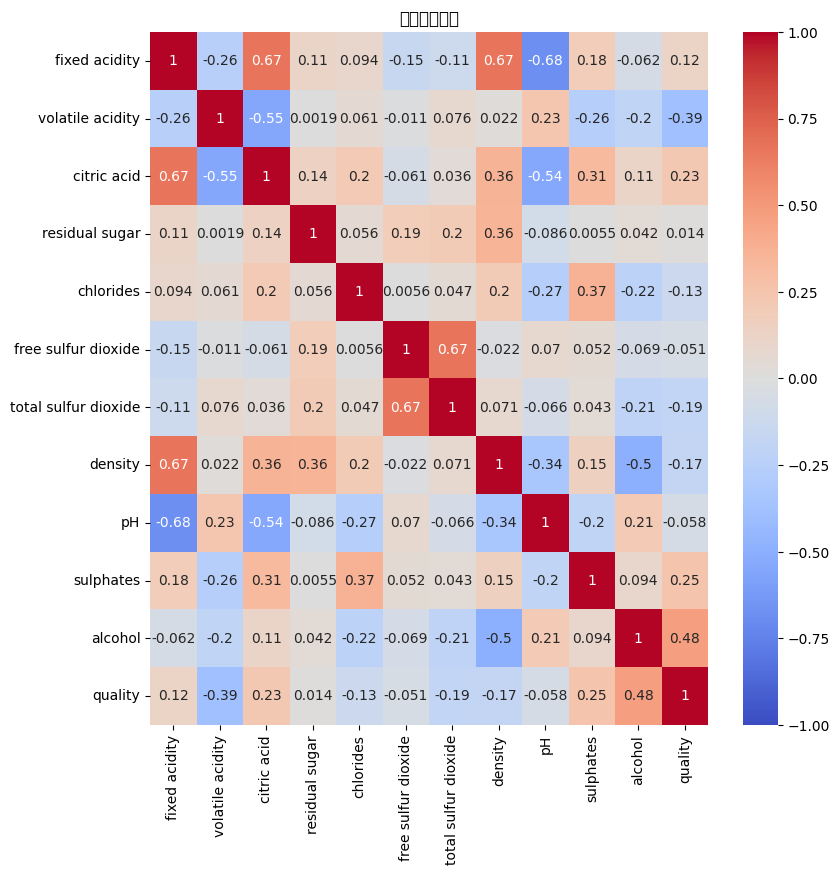

residual sugar          0.013732
free sulfur dioxide     0.050656
pH                      0.057731
fixed acidity           0.124052
chlorides               0.128907
density                 0.174919
total sulfur dioxide    0.185100
citric acid             0.226373
sulphates               0.251397
volatile acidity        0.390558
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


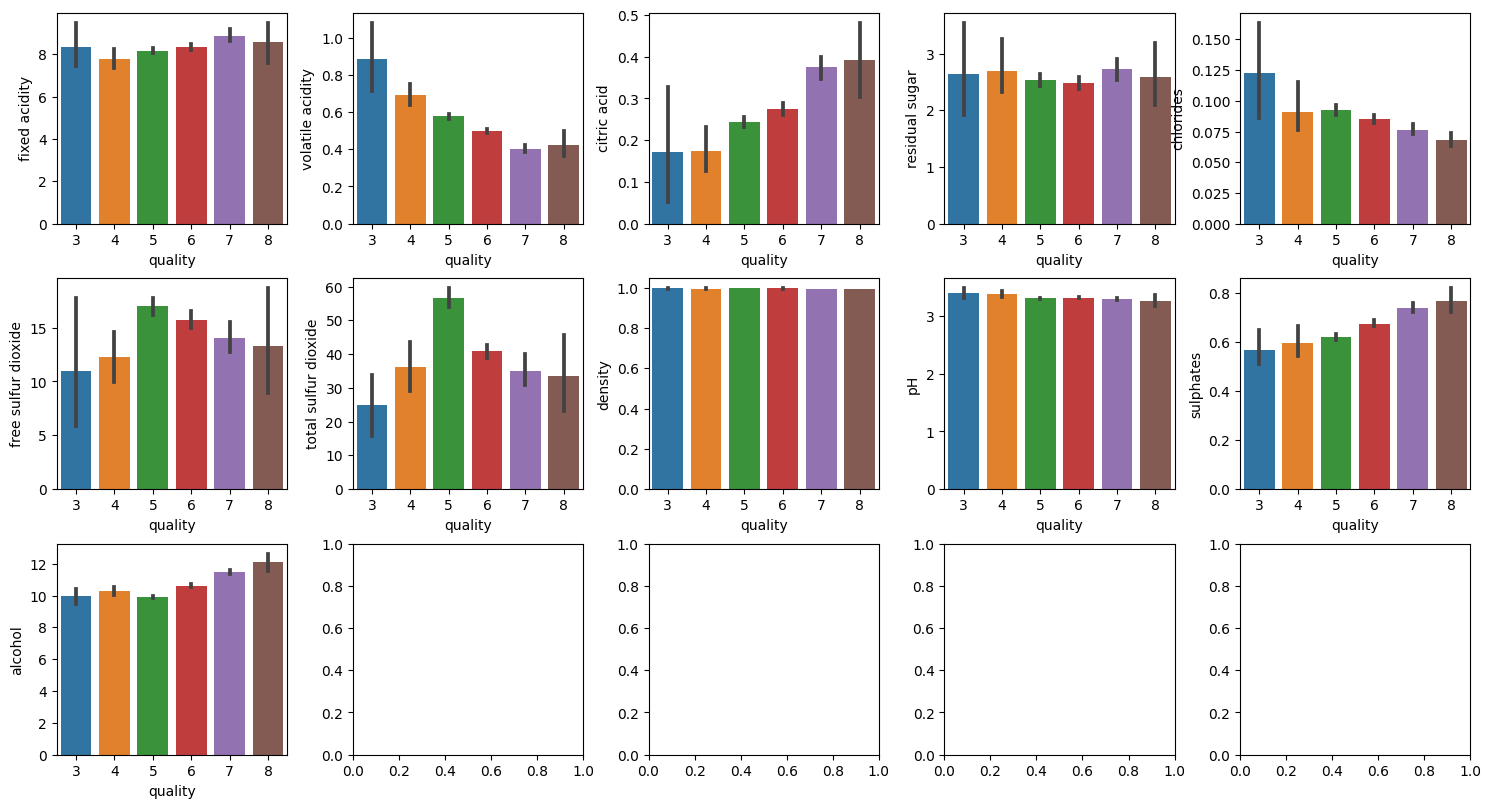

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.247788          0.397260         0.00             1.9   0.106845   
1          0.283186          0.520548         0.00             2.6   0.143573   
2          0.283186          0.438356         0.04             2.3   0.133556   
3          0.584071          0.109589         0.56             1.9   0.105175   
4          0.247788          0.397260         0.00             1.9   0.106845   
...             ...               ...          ...             ...        ...   
1594       0.141593          0.328767         0.08             2.0   0.130217   
1595       0.115044          0.294521         0.10             2.2   0.083472   
1596       0.150442          0.267123         0.13             2.3   0.106845   
1597       0.115044          0.359589         0.12             2.0   0.105175   
1598       0.123894          0.130137         0.47             3.6   0.091820   

      free sulfur dioxide  

In [35]:
from tables.table import Column
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

wine=pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
wine.head()
wine.describe()
wine.info()
for column in wine.columns:
  print(column)
# 比較每個特徵間的關聯程度
correlation_matrix=wine.corr()
print(correlation_matrix)
plt.figure(figsize=(9,9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('相關性熱力圖')
plt.show()
# 找出高度正相關的特徵們
# 1. 請嘗試觀察與標籤欄位「紅酒品質 quality」關係比較大的特徵欄位有哪些？你是如何定義「關係大」的呢？
print(wine.corr()['quality'].abs().sort_values())
# 取前四個影響力大的分別是(影響力>0.2)
# 1. alcohol
# 2. volatile acidity
# 3. sulphates
# 4. citric acid


fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15, 8))
ax = ax.flatten()
index=0
for i in wine.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=wine, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show()
# 2. 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？
# fixed acidity、residual sugar、density、PH 對quality沒甚麼影響力所以應該刪掉

# 特徵工程
# 刪除 free sulfur dioxide、residual sugar、density、PH 欄位
clean_df = wine.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis =1)
clean_df
# 3. 請你針對「數值型」的幾個欄位，嘗試比較不同的正規化方法（例如：Standardize、Min-Max Normalization）？


# 特徵標準化(Standardize)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# feature_columns = clean_df.columns.difference(["quality"])
# clean_df[feature_columns] = scaler.fit_transform(clean_df[feature_columns])
# print(wine)
# Min-Max Normalization（最小-最大標準化）
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_columns = clean_df.columns.difference(["quality"])
wine[feature_columns] = scaler.fit_transform(wine[feature_columns])
print(wine)




from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# 將 'quality' 欄位的值轉換為二元分類（1代表優質酒，0代表非優質酒）
wine['quality'] = wine['quality'].apply(lambda x: 1 if x >= 7 else 0)

# split X,y & train, test
X = wine.drop('quality', axis = 1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 建模&交叉驗證
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, X_train, y_train, cv=5, scoring='accuracy')
print('LogisticRegression:',scores.mean())

rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print('RandomForestClassifier:',rfc_eval.mean())

# 測試其他模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# 測試svc
svc = SVC(kernel='linear')
svc_scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
print('svc:',svc_scores.mean())
# 測試DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')
print('DecisionTreeClassifier:',dt_scores.mean())